# **Palmers Penguins Extended**

## Objectives

* This is an example dataset from Kaggle on which I want to perform a clustering ML example

## Inputs

* It is the Palmers Penguins Extended dataset from kaggle https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data 

## Outputs

* I will output a cleaned CSV file, as well as some basic visualisations in a jupyter notebook
* I also hope to make a streamlit page



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Penguin-ML-Classification\\jupyter_notebooks'

# Data cleaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [5]:
df = pd.read_csv("../data/palmerpenguins_extended.csv")
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
5,Adelie,Biscoe,35.7,16.8,194.0,5266.0,female,fish,juvenile,overweight,2021
6,Adelie,Biscoe,61.0,20.8,211.0,5961.0,female,fish,adult,overweight,2021
7,Adelie,Biscoe,66.1,20.8,246.0,6653.0,male,fish,adult,overweight,2021
8,Adelie,Biscoe,61.4,19.9,270.0,6722.0,male,fish,adult,overweight,2021
9,Adelie,Biscoe,54.9,22.3,230.0,6494.0,male,fish,adult,overweight,2021


---

In [6]:
print(df.shape)

print(df.info())

(3430, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB
None


In [7]:
cols = df.columns

for col in cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
    
print(df.info())

#same thing but in one line from ChatGPT
#df = df.astype({col: "category" for col in df.select_dtypes('object').columns})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            3430 non-null   category
 1   island             3430 non-null   category
 2   bill_length_mm     3430 non-null   float64 
 3   bill_depth_mm      3430 non-null   float64 
 4   flipper_length_mm  3430 non-null   float64 
 5   body_mass_g        3430 non-null   float64 
 6   sex                3430 non-null   category
 7   diet               3430 non-null   category
 8   life_stage         3430 non-null   category
 9   health_metrics     3430 non-null   category
 10  year               3430 non-null   int64   
dtypes: category(6), float64(4), int64(1)
memory usage: 155.0 KB
None


drop year column

In [8]:
df = df.drop('year', axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight
...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy


In [9]:
df.describe().round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3430.00,3430.00,3430.00,3430.00
mean,38.53,18.45,207.03,4834.71
std,13.18,2.77,28.94,1311.09
min,13.60,9.10,140.00,2477.00
25%,28.90,16.60,185.00,3843.50
50%,34.50,18.40,203.00,4633.50
75%,46.60,20.30,226.00,5622.00
max,88.20,27.90,308.00,10549.00


Summary statistics for each species

In [10]:
df.groupby('species').describe()

C:\Users\tb975\AppData\Local\Temp\ipykernel_20420\1134843197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('species').describe()


bill_length_mm                                                       \
                   count       mean        std   min    25%   50%   75%   max   
species                                                                         
Adelie            1560.0  35.431603  11.563505  13.6  27.10  32.3  41.3  78.4   
Chinstrap          623.0  35.014607  10.846660  17.0  28.35  31.8  38.8  75.5   
Gentoo            1247.0  44.161909  14.203180  16.8  32.50  40.7  55.8  88.2   

          bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                  count       mean  ...               75%    max       count   
species                             ...                                        
Adelie           1560.0  17.464487  ...             219.0  298.0      1560.0   
Chinstrap         623.0  18.421188  ...             215.0  299.0       623.0   
Gentoo           1247.0  19.689415  ...             239.0  308.0      1247.0   

                                                                               
                  mean          std     min     25%     50%      75%      max  
species                                                                        
Adelie     4445.475641  1063.539766  2477.0  3618.0  4343.5  5121.25   8128.0  
Chinstrap  4602.531300  1109.656848  2704.0  3821.5  4439.0  5232.50   8845.0  
Gentoo     5437.640738  1456.089810  2642.0  4315.5  5234.0  6422.50  10549.0  

[3 rows x 32 columns]

C:\Users\tb975\AppData\Local\Temp\ipykernel_20420\349408074.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("species")[num_cols].mean().plot(kind="bar", figsize=(10,6))


<Axes: xlabel='species'>

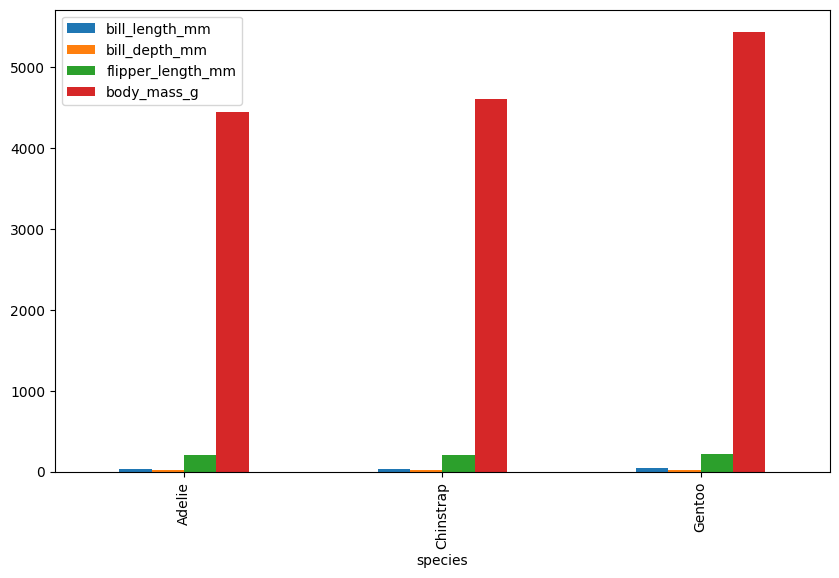

In [11]:
num_cols = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
df.groupby("species")[num_cols].mean().plot(kind="bar", figsize=(10,6))

In [12]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
dtype: int64

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3425    False
3426    False
3427    False
3428    False
3429    False
Length: 3430, dtype: bool

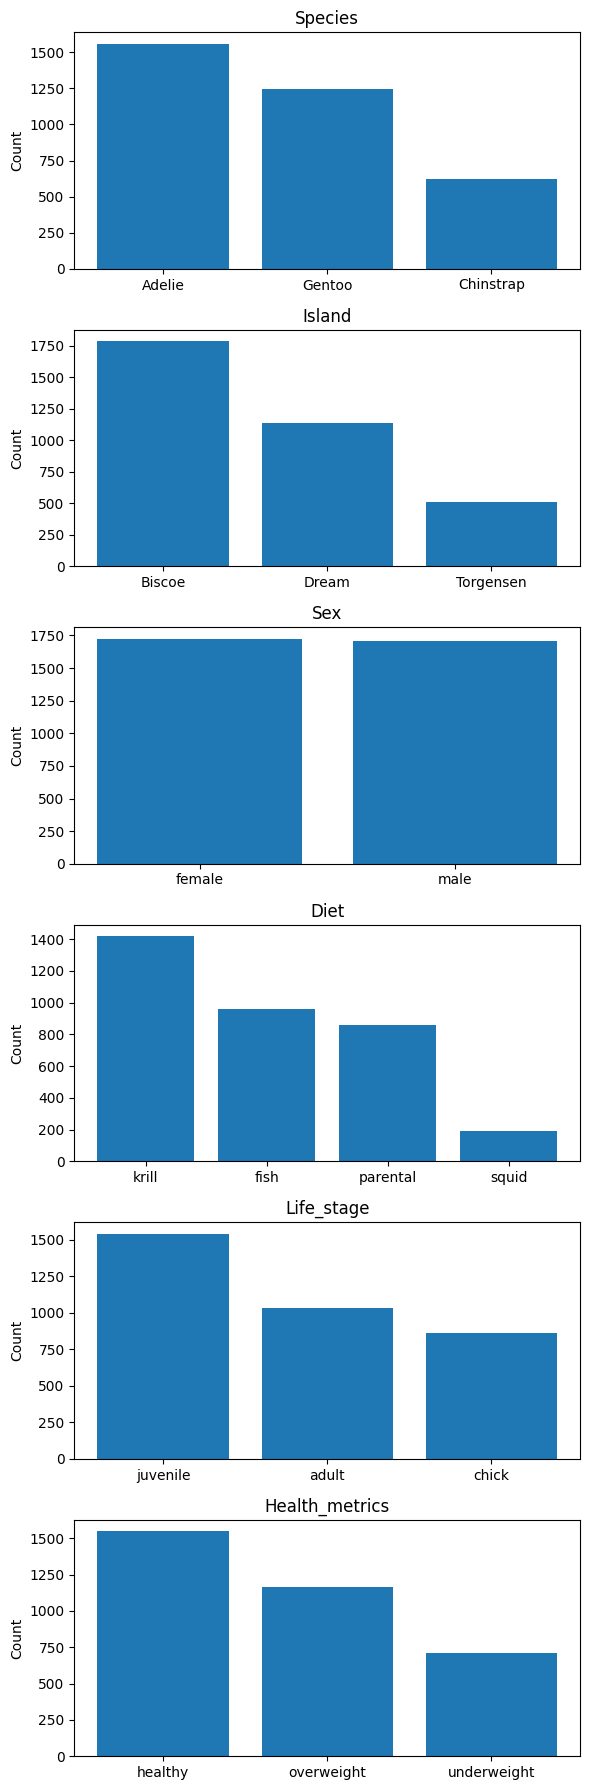

In [14]:
cat_cols = df.select_dtypes('category').columns
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(6, 3* len(cat_cols)))

# If only one categorical column, axes is not a list → fix by wrapping in a list (copied from gpt)
if len(cat_cols) == 1:
    ax = [ax]

for i, col in enumerate(cat_cols):
    count =df[col].value_counts()
    ax[i].bar(x=count.index, height=count.values)
    ax[i].set_ylabel('Count')
    ax[i].set_title(col.capitalize())
plt.tight_layout()
plt.show()   

Investigate distributions of numerical columns

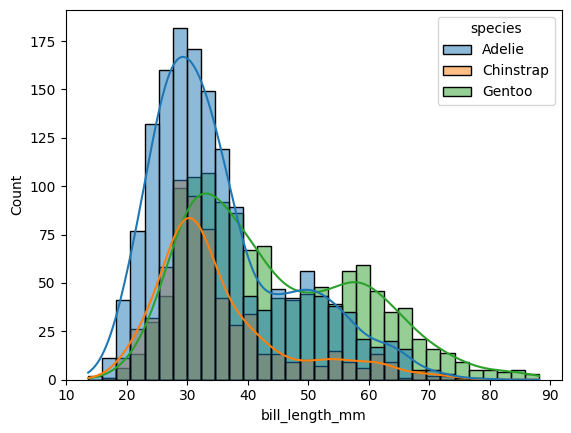

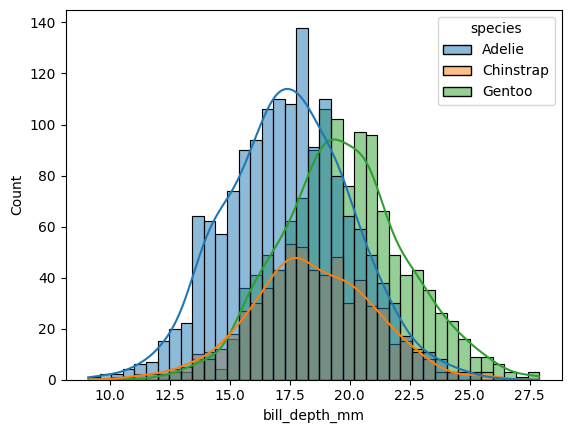

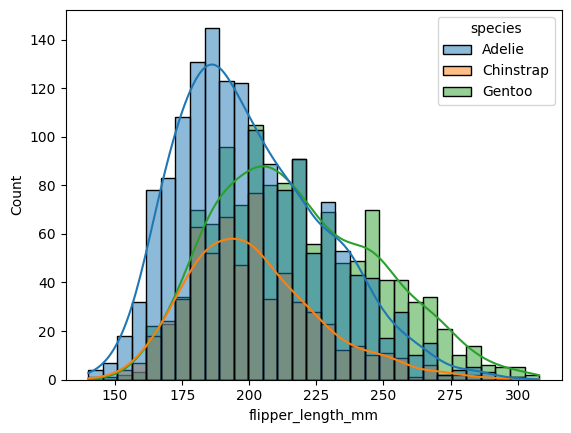

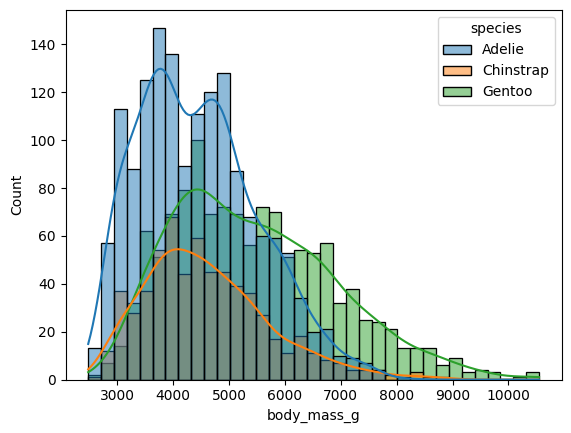

In [15]:
for col in num_cols:
    sns.histplot(data=df, x=col, hue='species', kde=True)
    plt.show()

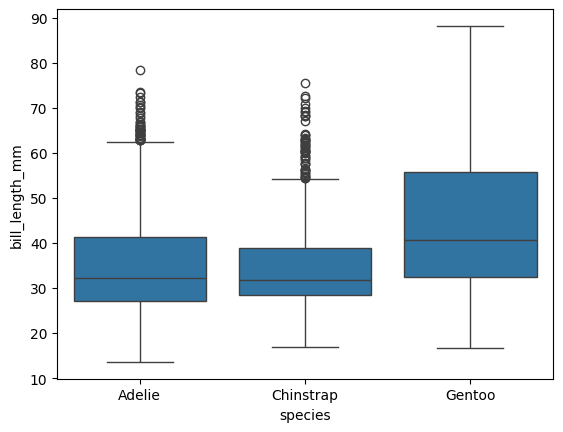

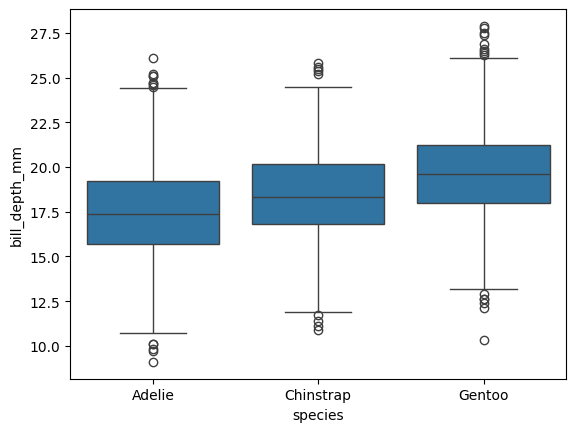

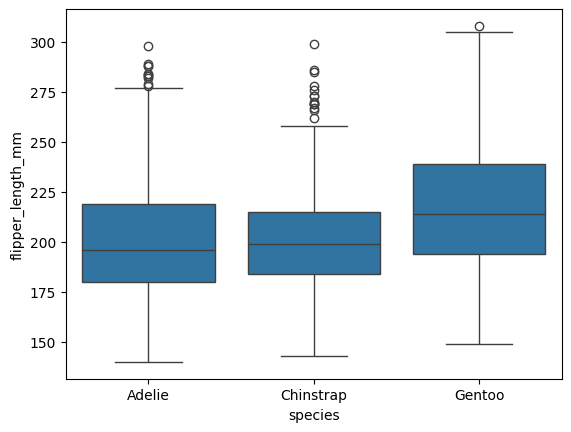

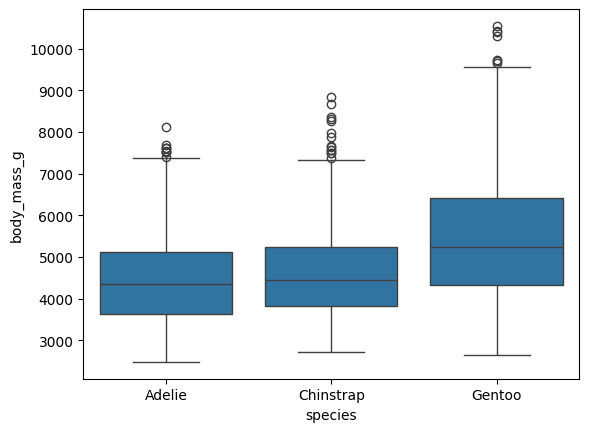

In [16]:
for col in num_cols:
    sns.boxplot(data=df, x="species", y=col)
    plt.show()

Bill depth is showing distinct medians, could be a good candidate for classification

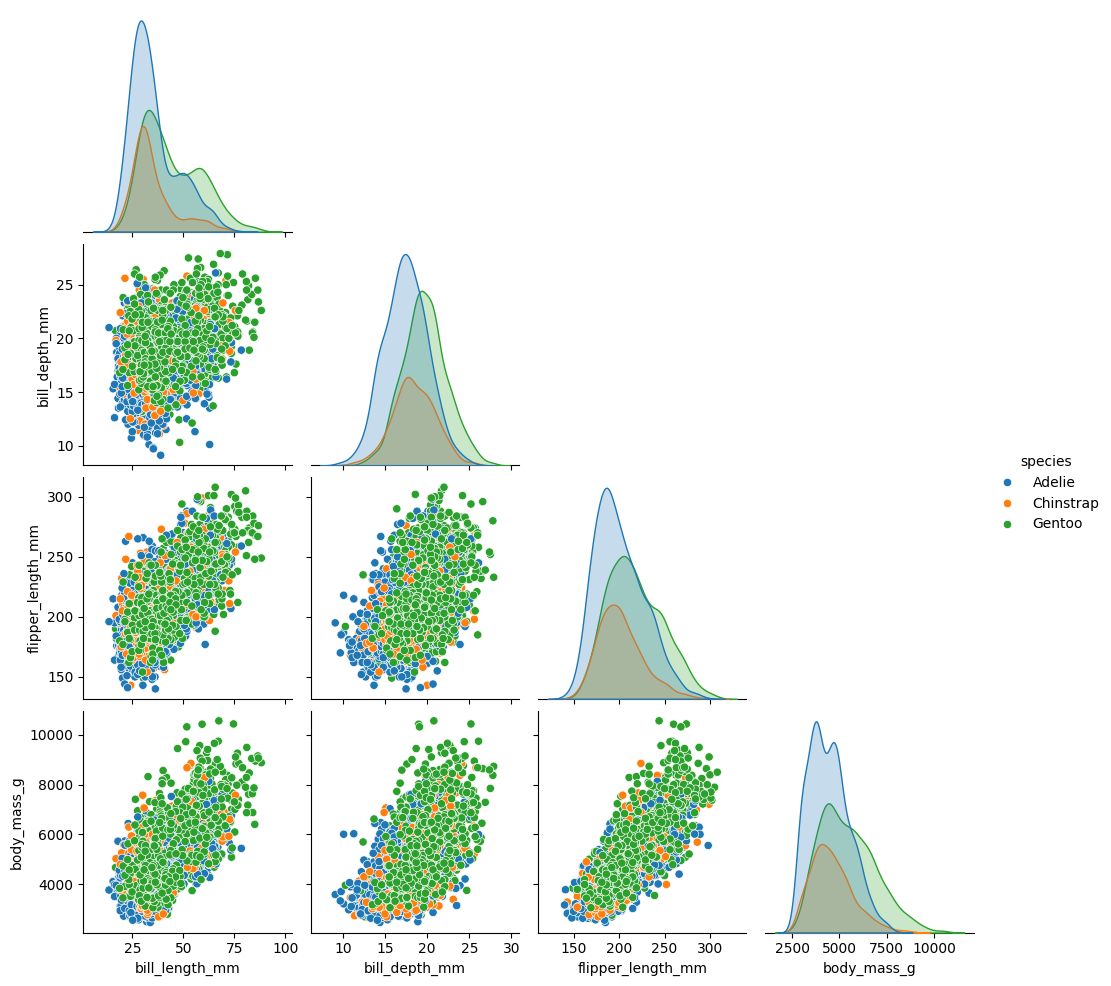

In [17]:
sns.pairplot(df, hue="species", corner=True)

In [18]:
df.to_csv('../data/penguins_cleaned.csv', index=False)